In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
!curl -O https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  853k  100  853k    0     0   205k      0  0:00:04  0:00:04 --:--:--  205k


In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [8]:
df.head(100)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
95,200,2.0,232.0,3476.591797,11.0,2016,USA,Gasoline,All-wheel drive,1.0,14.674507
96,120,5.0,172.0,3475.004528,13.8,2013,USA,Diesel,All-wheel drive,NaN,12.743224
97,280,2.0,133.0,3398.340992,15.3,2015,Europe,Diesel,All-wheel drive,1.0,13.930128
98,250,NaN,109.0,3210.919484,14.6,2021,USA,Diesel,All-wheel drive,0.0,13.128946


In [6]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [11]:
df = df.fillna(0)

In [12]:
df.isnull().sum()

engine_displacement    0
num_cylinders          0
horsepower             0
vehicle_weight         0
acceleration           0
model_year             0
origin                 0
fuel_type              0
drivetrain             0
num_doors              0
fuel_efficiency_mpg    0
dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [15]:
y_train = df_train.fuel_efficiency_mpg
y_val   = df_val.fuel_efficiency_mpg
y_test  = df_test.fuel_efficiency_mpg

In [16]:
y_test

0       15.865949
1       17.885965
2       10.882701
3       14.216032
4       18.016395
          ...    
1936    14.310263
1937    10.164457
1938    13.354373
1939    17.038592
1940    15.026741
Name: fuel_efficiency_mpg, Length: 1941, dtype: float64

In [17]:
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [19]:
df_train

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0
4,250,4.0,133.0,2362.426930,16.3,2010,USA,Diesel,Front-wheel drive,-1.0
...,...,...,...,...,...,...,...,...,...,...
5817,230,3.0,176.0,3430.993044,17.9,2022,Europe,Diesel,All-wheel drive,0.0
5818,250,4.0,180.0,3067.664350,15.7,2010,Asia,Diesel,All-wheel drive,-1.0
5819,230,2.0,182.0,3041.964593,16.7,2010,Europe,Diesel,All-wheel drive,0.0
5820,180,7.0,147.0,2453.341430,15.2,2015,Europe,Gasoline,All-wheel drive,0.0


In [20]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeRegressor

In [22]:
train_dicts = df_train.to_dict(orient='records')
val_dicts = df_val.to_dict(orient='records')

In [23]:
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [24]:
regressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [25]:
X_val = dv.transform(val_dicts)

In [26]:
y_pred = regressor.predict(X_val)

In [27]:
y_pred

array([16.88218854, 16.88218854, 16.88218854, ..., 12.9383797 ,
       12.9383797 , 16.88218854])

In [29]:
from sklearn.tree import export_text
print(export_text(regressor, feature_names=list(dv.get_feature_names_out())))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [31]:
rf_regressor.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [32]:
y_pred = rf_regressor.predict(X_val)

In [33]:
y_pred

array([18.63022386, 15.28350603, 18.23335218, ..., 14.76992054,
       13.42136371, 16.09078634])

In [34]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
rmse

np.float64(0.45707126026197337)

In [49]:
n = 0
scores = []
for n in range(10,201,10):
    rf_regressor = RandomForestRegressor(n_estimators=n, n_jobs=-1, random_state=1)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    rmse = np.round(mean_squared_error(y_val, y_pred),3)
    print("%d -> %f"%(n, rmse))
    scores.append((n, rmse))





10 -> 0.209000
20 -> 0.204000
30 -> 0.203000
40 -> 0.200000
50 -> 0.199000
60 -> 0.198000
70 -> 0.198000
80 -> 0.198000
90 -> 0.197000
100 -> 0.197000
110 -> 0.196000
120 -> 0.197000
130 -> 0.196000
140 -> 0.196000
150 -> 0.196000
160 -> 0.196000
170 -> 0.196000
180 -> 0.195000
190 -> 0.195000
200 -> 0.196000


In [50]:
scores

[(10, np.float64(0.209)),
 (20, np.float64(0.204)),
 (30, np.float64(0.203)),
 (40, np.float64(0.2)),
 (50, np.float64(0.199)),
 (60, np.float64(0.198)),
 (70, np.float64(0.198)),
 (80, np.float64(0.198)),
 (90, np.float64(0.197)),
 (100, np.float64(0.197)),
 (110, np.float64(0.196)),
 (120, np.float64(0.197)),
 (130, np.float64(0.196)),
 (140, np.float64(0.196)),
 (150, np.float64(0.196)),
 (160, np.float64(0.196)),
 (170, np.float64(0.196)),
 (180, np.float64(0.195)),
 (190, np.float64(0.195)),
 (200, np.float64(0.196))]

In [51]:
columns = ["n_estimatoros","rmse"]
df_scores = pd.DataFrame(scores, columns=columns)

In [52]:
df_scores

,n_estimatoros,rmse
0,10,0.209
1,20,0.204
2,30,0.203
3,40,0.200
4,50,0.199
5,60,0.198
6,70,0.198
7,80,0.198
8,90,0.197
9,100,0.197


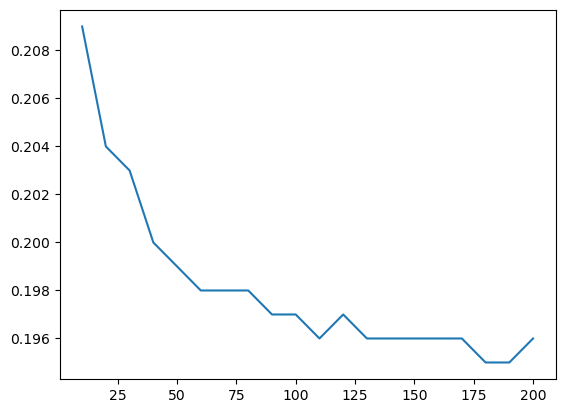

In [54]:
plt.plot(df_scores.n_estimatoros, df_scores.rmse)

In [55]:
n = 0
scores = []
for d in [10, 15, 20, 25]:
    for n in range(10,201,10):
        rf_regressor = RandomForestRegressor(n_estimators=n, n_jobs=-1, max_depth=d, random_state=1)
        rf_regressor.fit(X_train, y_train)
        y_pred = rf_regressor.predict(X_val)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.round(mean_squared_error(y_val, y_pred),3)
        print("%d -> %d -> %f"%(n, d, rmse))
        scores.append((n, d, rmse))

10 -> 10 -> 0.203000
20 -> 10 -> 0.200000
30 -> 10 -> 0.198000
40 -> 10 -> 0.196000
50 -> 10 -> 0.195000
60 -> 10 -> 0.195000
70 -> 10 -> 0.195000
80 -> 10 -> 0.195000
90 -> 10 -> 0.195000
100 -> 10 -> 0.195000
110 -> 10 -> 0.194000
120 -> 10 -> 0.194000
130 -> 10 -> 0.194000
140 -> 10 -> 0.194000
150 -> 10 -> 0.193000
160 -> 10 -> 0.193000
170 -> 10 -> 0.194000
180 -> 10 -> 0.193000
190 -> 10 -> 0.193000
200 -> 10 -> 0.193000
10 -> 15 -> 0.209000
20 -> 15 -> 0.204000
30 -> 15 -> 0.203000
40 -> 15 -> 0.201000
50 -> 15 -> 0.199000
60 -> 15 -> 0.198000
70 -> 15 -> 0.198000
80 -> 15 -> 0.198000
90 -> 15 -> 0.197000
100 -> 15 -> 0.197000
110 -> 15 -> 0.196000
120 -> 15 -> 0.197000
130 -> 15 -> 0.196000
140 -> 15 -> 0.196000
150 -> 15 -> 0.196000
160 -> 15 -> 0.195000
170 -> 15 -> 0.196000
180 -> 15 -> 0.195000
190 -> 15 -> 0.195000
200 -> 15 -> 0.195000
10 -> 20 -> 0.210000
20 -> 20 -> 0.205000
30 -> 20 -> 0.204000
40 -> 20 -> 0.202000
50 -> 20 -> 0.200000
60 -> 20 -> 0.199000
70 -> 20 -> 

In [56]:
scores

[(10, 10, np.float64(0.203)),
 (20, 10, np.float64(0.2)),
 (30, 10, np.float64(0.198)),
 (40, 10, np.float64(0.196)),
 (50, 10, np.float64(0.195)),
 (60, 10, np.float64(0.195)),
 (70, 10, np.float64(0.195)),
 (80, 10, np.float64(0.195)),
 (90, 10, np.float64(0.195)),
 (100, 10, np.float64(0.195)),
 (110, 10, np.float64(0.194)),
 (120, 10, np.float64(0.194)),
 (130, 10, np.float64(0.194)),
 (140, 10, np.float64(0.194)),
 (150, 10, np.float64(0.193)),
 (160, 10, np.float64(0.193)),
 (170, 10, np.float64(0.194)),
 (180, 10, np.float64(0.193)),
 (190, 10, np.float64(0.193)),
 (200, 10, np.float64(0.193)),
 (10, 15, np.float64(0.209)),
 (20, 15, np.float64(0.204)),
 (30, 15, np.float64(0.203)),
 (40, 15, np.float64(0.201)),
 (50, 15, np.float64(0.199)),
 (60, 15, np.float64(0.198)),
 (70, 15, np.float64(0.198)),
 (80, 15, np.float64(0.198)),
 (90, 15, np.float64(0.197)),
 (100, 15, np.float64(0.197)),
 (110, 15, np.float64(0.196)),
 (120, 15, np.float64(0.197)),
 (130, 15, np.float64(0.196)

In [59]:
columns = ["n_estimatoros", "d", "rmse"]
df_scores = pd.DataFrame(scores, columns=columns)

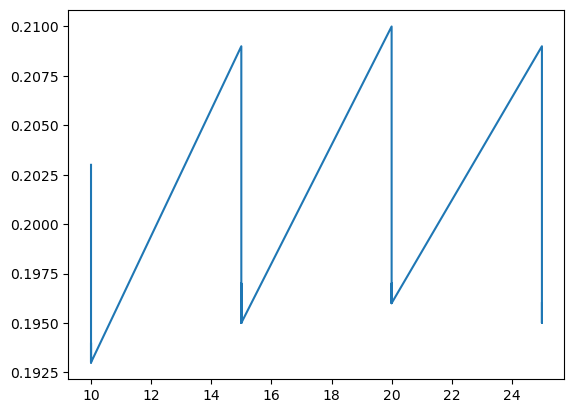

In [60]:
plt.plot(df_scores.dregressor = DecisionTreeRegressor(max_depth=1)
regressor.fit(X_train, y_train
              , df_scores.rmse)

In [69]:
rf_regressor = RandomForestRegressor(n_estimators=10, n_jobs=-1, max_depth=20, random_state=1)
rf_regressor.fit(X_train, y_train)

,n_estimators,10
,criterion,'squared_error'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [70]:
feature_importances = rf_regressor.feature_importances_

In [71]:
feature_importances

array([1.14536287e-02, 3.96650944e-04, 3.11283259e-04, 3.28170182e-03,
       3.69466267e-04, 3.01551010e-04, 1.60423301e-02, 3.16452511e-03,
       2.33145848e-03, 1.62794233e-03, 4.85137573e-04, 4.93652614e-04,
       5.64584351e-04, 9.59176087e-01])

In [74]:
feature_names = dv.get_feature_names_out()

In [75]:
feature_names

array(['acceleration', 'drivetrain=All-wheel drive',
       'drivetrain=Front-wheel drive', 'engine_displacement',
       'fuel_type=Diesel', 'fuel_type=Gasoline', 'horsepower',
       'model_year', 'num_cylinders', 'num_doors', 'origin=Asia',
       'origin=Europe', 'origin=USA', 'vehicle_weight'], dtype=object)

In [76]:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

In [78]:
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [79]:
importance_df

,Feature,Importance
13,vehicle_weight,0.959176
6,horsepower,0.016042
0,acceleration,0.011454
3,engine_displacement,0.003282
7,model_year,0.003165
8,num_cylinders,0.002331
9,num_doors,0.001628
12,origin=USA,0.000565
11,origin=Europe,0.000494
10,origin=Asia,0.000485


In [125]:
import xgboost as xgb


In [142]:

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [143]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [144]:
%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [145]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [146]:
df_score = parse_xgb_output(output)

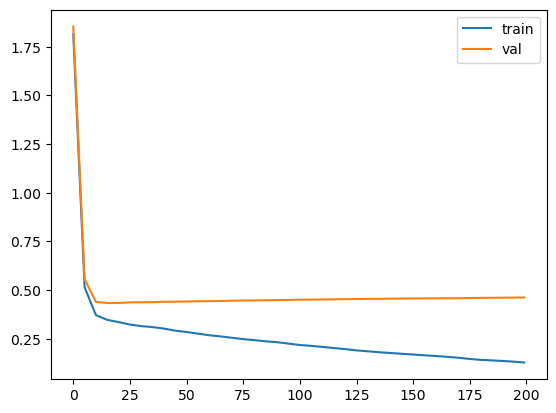

In [147]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

In [148]:

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

In [149]:
%%capture output
model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [150]:
df_score2 = parse_xgb_output(output)

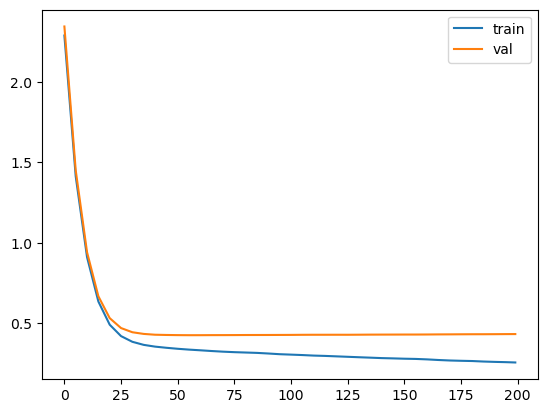

In [151]:
plt.plot(df_score2.num_iter, df_score2.train_auc, label='train')
plt.plot(df_score2.num_iter, df_score2.val_auc, label='val')
plt.legend()

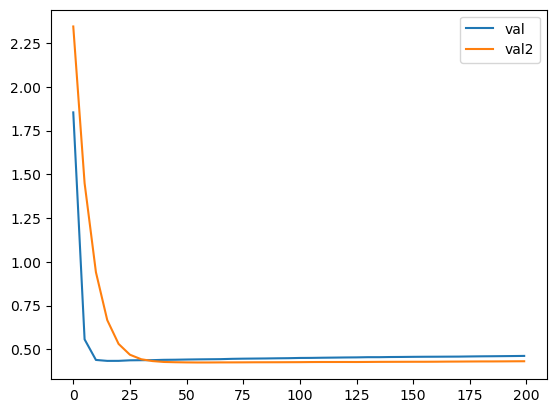

In [152]:
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.plot(df_score2.num_iter, df_score2.val_auc, label='val2')
plt.legend()